In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
from glob import glob
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import keras

2021-11-24 11:45:49.692136: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def show_image_prediction(x, prediction, labels, right_label):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.title(right_label)
    plt.imshow(x.reshape((299,299)), cmap='gray')
    
    plt.subplot(1,2,2)
    p_max = prediction[0].max()
    
    plt.bar(LABELS, prediction[0]/p_max,width = 0.4)

    pred_label_index = np.where(prediction[0]==p_max)[0][0]
    plt.title('NN prediction')
    plt.show()

2021-11-24 11:45:51.793178: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-24 11:45:51.794042: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-24 11:45:51.858353: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 11:45:51.858638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-11-24 11:45:51.858666: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-24 11:45:51.860067: I tensorflow/stream_executor/platform/def

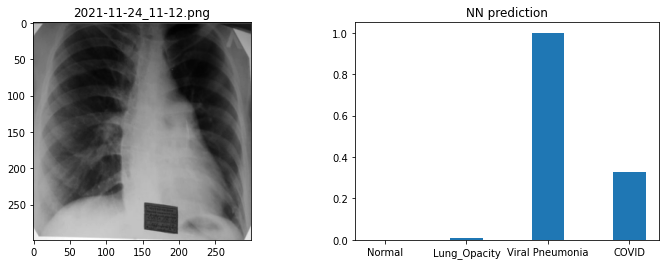

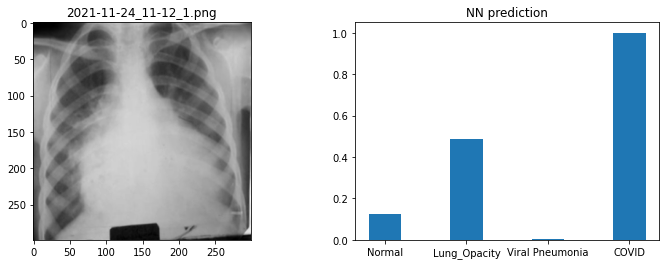

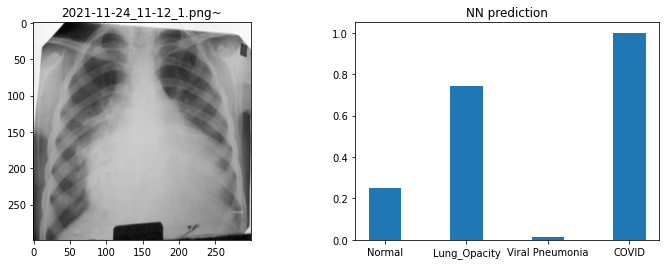

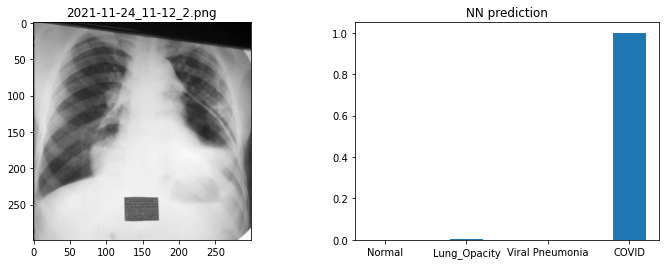

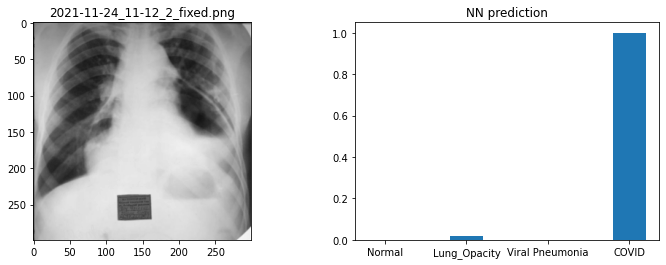

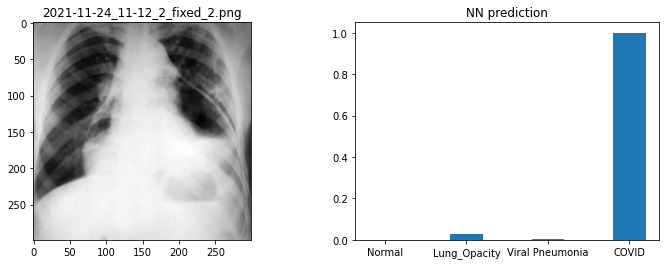

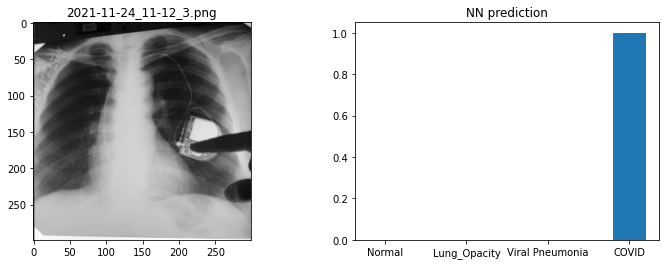

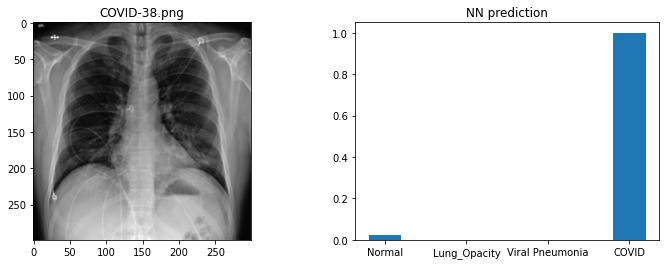

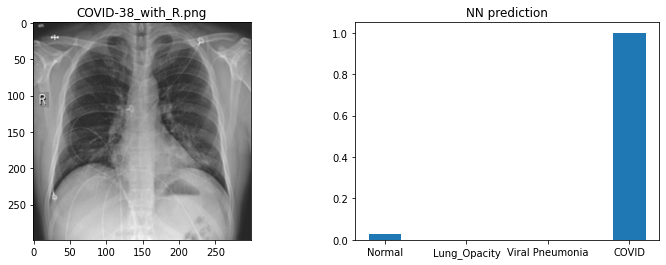

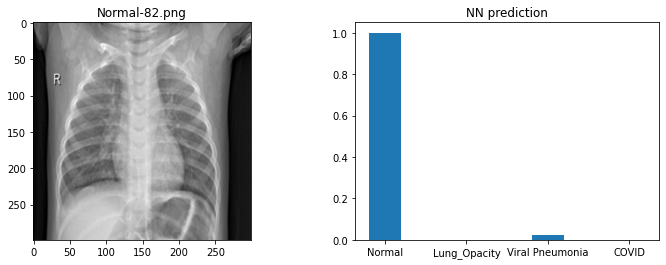

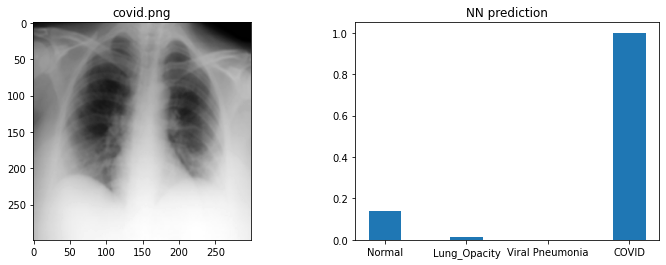

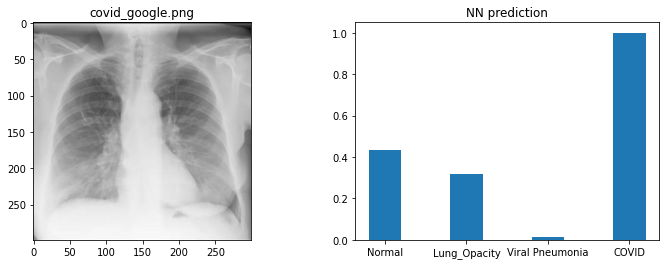

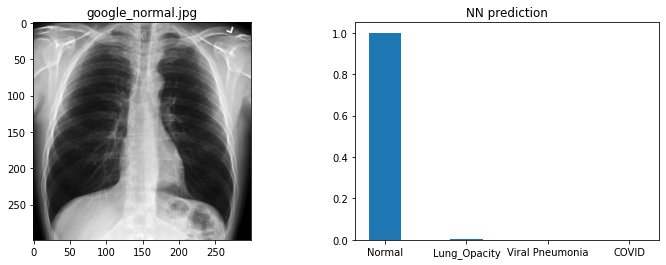

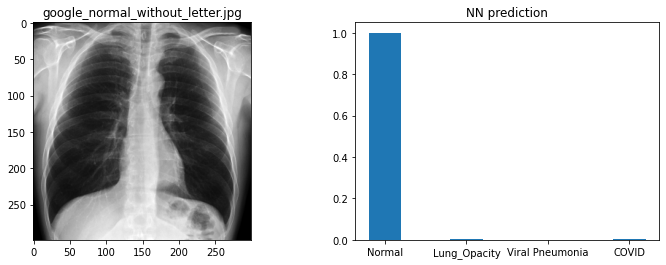

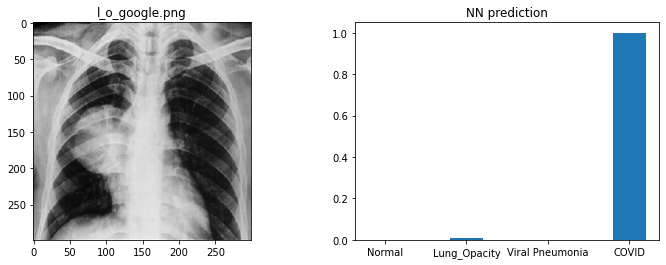

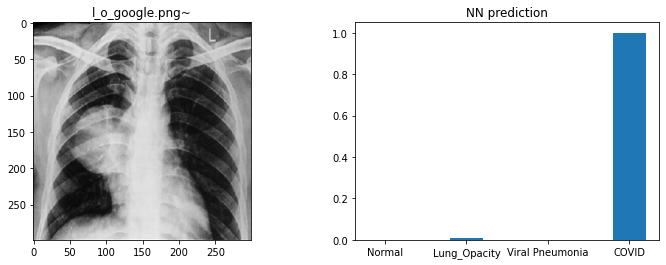

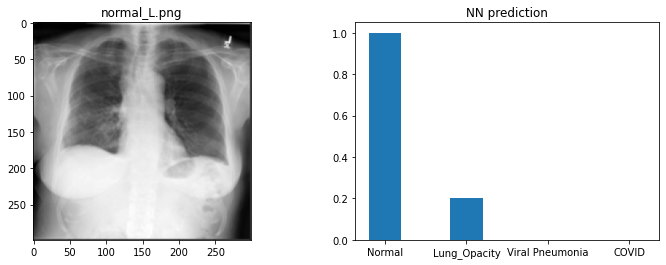

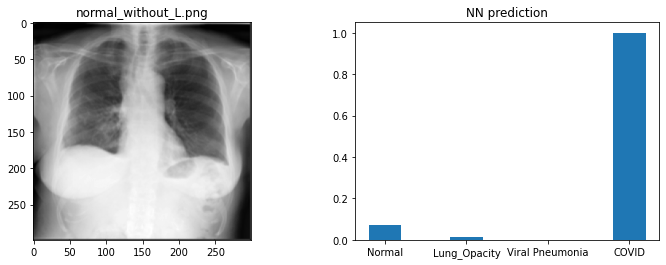

In [3]:
LABELS = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

path = '6_2/epoch3.h5'
model = models.load_model('checkpoints/'+path)

dir = './test_data'
for root, dirs, files in os.walk(dir):
    for file in sorted(files):
        image_path = f'{dir}/{file}'
        img = cv2.imread(image_path, 0)
        resized = cv2.resize(img, (299, 299), interpolation = cv2.INTER_AREA)/255
        image_bits = np.array(resized).reshape((1,299,299,1))
        
        show_image_prediction(image_bits, model.predict(image_bits), LABELS, file)